In [1]:
#unsupervised learning algorithm
#dimension reduction, feature extraction, denoising 

from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings

warnings.filterwarnings("ignore")



In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [17]:
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


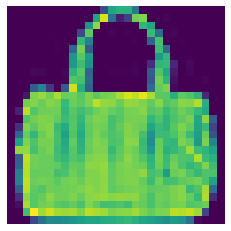

In [12]:
plt.imshow(x_train[4000].reshape(28, 28))
plt.axis("off")
plt.show()

In [23]:
input_img = Input(shape= (784,))

encoded = Dense(32, activation="relu")(input_img)
encoded1 = Dense(16, activation="relu")(encoded)

decoded = Dense(32, activation="relu")(encoded1)

output = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

hist = autoencoder.fit(x_train, x_train, epochs = 200, batch_size=256, shuffle=True, validation_data=(x_train, x_train))

Epoch 1/200


ValueError: in user code:

    C:\Users\yagiz\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\keras\backend.py:5015 binary_crossentropy
        bce = target * tf.math.log(output + epsilon())
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:1383 binary_op_wrapper
        raise e
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:1367 binary_op_wrapper
        return func(x, y, name=name)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:1710 _mul_dispatch
        return multiply(x, y, name=name)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:530 multiply
        return gen_math_ops.mul(x, y, name)
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:6244 mul
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\yagiz\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 784 and 32 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](IteratorGetNext:1, binary_crossentropy/Log)' with input shapes: [?,784], [?,32].
